In [19]:
import sqlite3
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [20]:
fn = 'dump.sqlite'
points = pd.read_sql('select * from points where not banned', sqlite3.connect(fn))


In [21]:
# unnecessary/ unknown features
points = points.drop(columns=['banned','ip'])

# fokus on basic features
points = points[['lat', 'lon', 'wait']]
points = points.dropna()

In [22]:
waiting_time_per_point = points.groupby(["lat", "lon"]).mean()

In [23]:
# splitting 60-20-20
train, test = train_test_split(waiting_time_per_point, test_size=0.2)
train, val = train_test_split(train, test_size=0.25)

In [24]:
train.index.get_level_values('lat')

Index([   47.214354330018,  57.91288464151947,   51.4674245991056,
        53.01047888244105,  49.13095210147465,  55.78211519412608,
         50.1490749348647,  50.81917798121822,   52.2299811581569,
       46.570139407874606,
       ...
        51.51987620314543,  51.82957184702857,    44.215723474446,
          49.521698243264, -43.47890249193155,  41.13002341913978,
       58.238257760984034, 40.385238690289455,  50.91969427632967,
        59.28913089898556],
      dtype='float64', name='lat', length=9885)

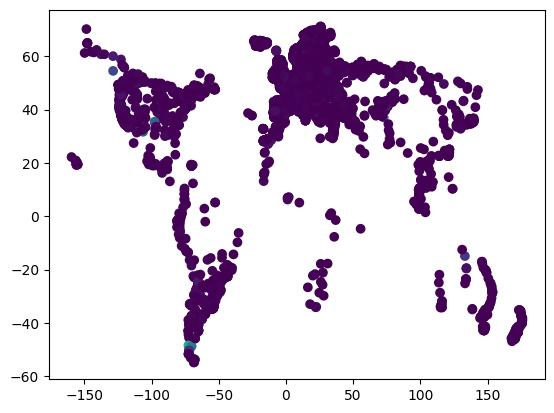

In [25]:
plt.scatter(train.index.get_level_values('lon'), train.index.get_level_values('lat'), c=train['wait'], cmap='viridis')

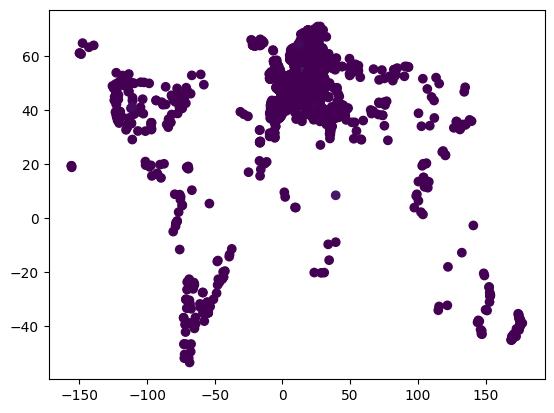

In [26]:
plt.scatter(val.index.get_level_values('lon'), val.index.get_level_values('lat'), c=val['wait'], cmap='viridis')

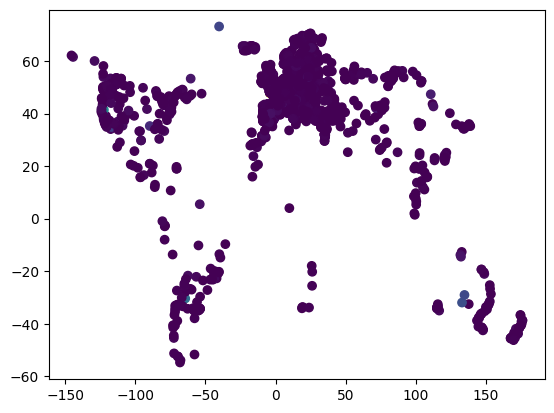

In [27]:
plt.scatter(test.index.get_level_values('lon'), test.index.get_level_values('lat'), c=test['wait'], cmap='viridis')

In [28]:
train.to_csv("data/points_train.csv", index=True)
val.to_csv("data/points_val.csv", index=True)
test.to_csv("data/points_test.csv", index=True)